https://www.markdownguide.org/cheat-sheet/

# Testarea Automată a Circuitelor
        --- Îndrumar de Laborator ---

### Lucrarea nr. 2 - Masurarea parametrilor semnalelor

#### 1.1 Montajul experimental:
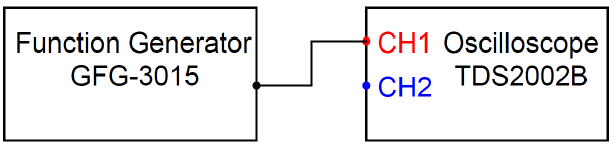


#### 1.2 Procedura de masurare:
Folosind o buclă de tip „for” se vor genera mai multe semnale cu diferiți parametri.


#### 1.3 Codul sursa:
1.3.1 Initializarea instrumentelor si a interfetelor grafice

In [ ]:
#using TIVM; # libraria responsabila de comunicatia cu instrumentele si cu interfetele grafice(front panels)
#using Plots; # libraria responsabila de generarea de grafice
#using DataFrames; #
#using CSV; # libraria responsabila de salvarea datelor in format .csv

In [1]:
# dmm_handle = connect!("ASRL4::INSTR")
# psu_handle = connect!("ASRL5::INSTR")
fgen_handle = connect!("ASRL1::INSTR")
scope_handle = connect!("USB0::0x0699::0x0364::C057729::INSTR")

# dmm = TIVM.GDM8246(dmm_handle);
# psu = TIVM.PST3201(psu_handle);
fgen = TIVM.GFG3015(fgen_handle);
scope = TIVM.TDS2002B(scope_handle);

In [2]:
# Panouri frontale pentru instrumente
#@async start_gui(psu_handle = psu_handle, dmm_handle = dmm_handle, fgen_handle = fgen_handle, scope_handle = scope_handle)
Threads.@spawn start_gui(fgen_handle = fgen_handle, scope_handle = scope_handle);

1.3.2 Connfigurarea instrumentelor

In [3]:
# Generatorul de semnal
set_wfm(fgen, "C1", "sinusoid")
sleep(1)
set_freq(fgen, "C1", 1000)
sleep(1)
set_amplit_unit(fgen, "C1", "Vpp")
sleep(1)
set_amplit(fgen, "C1", 0.1)
sleep(1)
set_offs(fgen, "C1", 0)
sleep(1)
set_duty(fgen, "C1", 50)
sleep(1)

In [4]:
# Osciloscopul
#autoset is hidden :P
#ch coupling - WIP
set_ch_position(scope, "CH1", 0)
set_ch_position(scope, "CH2", 0)
#ch probe - do we need this?
set_vertical_scale(scope, "CH1", 1) # ce facem cu canalele? le numim pe toate CHx in loc de Cx????
set_vertical_scale(scope, "CH2", 1)
set_horizontal_scale(scope, 0.005)
set_trig_ch(scope, "CH1")
set_trig_mode(scope, "NORMAL") # "NORMAL"/"AUTO"
set_trig_level(scope, 0.005)
# do we need trigger coupling or slope?
# Masuratori - se pot configura maxim 5 pt ambele canale impreuna
set_meas(scope, "MEAS1", "CH1", "FREQuency")
set_meas(scope, "MEAS2", "CH1", "PK2pk")
set_meas(scope, "MEAS3", "CH2", "FREQuency")
set_meas(scope, "MEAS4", "CH2", "PK2pk")
set_meas(scope, "MEAS5", "CH1", "PERIod")

1.3.3 Definirea stimulilor si a variabilelor auxiliare

In [5]:
freq = 1e3:1e3:4e3
amplit = 0.5:0.5:3
in_freq = []
in_amplit = []
meas_freq = []
meas_amplit = []
crt_meas_amplit = 0
crt_meas_freq = 0

0

1.3.4 Bucla de masurare

In [6]:
in_freq = []
in_amplit = []
meas_freq = []
meas_amplit = []
for crt_freq in freq
    set_freq(fgen, "C1", crt_freq)
    tbase = 1/crt_freq
    set_horizontal_scale(scope, tbase)
    sleep(1)
    for crt_amplit in amplit        
        set_vertical_scale(scope, "CH1", crt_amplit/2)
        set_amplit(fgen, "C1", crt_amplit)                        
        sleep(2) # fgen and osc are slow to respond
        
        crt_meas_amplit = get_meas_data(scope, "MEAS2")
        crt_meas_freq = get_meas_data(scope, "MEAS1")

        # store crt stimuli value
        push!(in_freq, crt_freq)
        push!(in_amplit, crt_amplit)
        
        # store crt measurement value
        push!(meas_freq, crt_meas_freq)
        push!(meas_amplit, crt_meas_amplit)
        
        # print info to console
        @info "set_freq=$crt_freq, meas_freq=$crt_meas_freq, set_ampl=$crt_amplit, meas_ampl=$crt_meas_amplit"
    end
end

┌ Info: set_freq=1000.0, meas_freq=990.7528686523, set_ampl=0.5, meas_ampl=1.0900000334
└ @ Main In[6]:27
┌ Info: set_freq=1000.0, meas_freq=996.0159912109, set_ampl=1.0, meas_ampl=2.1600000858
└ @ Main In[6]:27
┌ Info: set_freq=1000.0, meas_freq=999.9999389648, set_ampl=1.5, meas_ampl=3.2400000095
└ @ Main In[6]:27
┌ Info: set_freq=1000.0, meas_freq=999.9999389648, set_ampl=2.0, meas_ampl=4.3200001717
└ @ Main In[6]:27
┌ Info: set_freq=1000.0, meas_freq=999.9999389648, set_ampl=2.5, meas_ampl=5.5
└ @ Main In[6]:27
┌ Info: set_freq=1000.0, meas_freq=1002.0039672852, set_ampl=3.0, meas_ampl=6.4200000763
└ @ Main In[6]:27
┌ Info: set_freq=2000.0, meas_freq=2016.1290283203, set_ampl=0.5, meas_ampl=1.1100000143
└ @ Main In[6]:27
┌ Info: set_freq=2000.0, meas_freq=2016.1290283203, set_ampl=1.0, meas_ampl=2.2000000477
└ @ Main In[6]:27
┌ Info: set_freq=2000.0, meas_freq=2004.0079345703, set_ampl=1.5, meas_ampl=3.2999999523
└ @ Main In[6]:27
┌ Info: set_freq=2000.0, meas_freq=1999.9998779297,

1.3.5 Oprirea instrumentelor

1.3.6 Generarea caracteristicilor, dupa incheierea masuratorilor

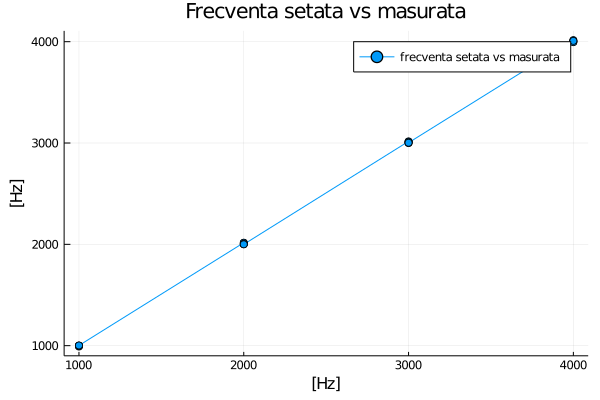

In [7]:
# frecventa
h1=plot(in_freq, meas_freq; markershape=:circle, label="frecventa setata vs masurata");
title!("Frecventa setata vs masurata");
xlabel!("[Hz]");
ylabel!("[Hz]");
display(h1)

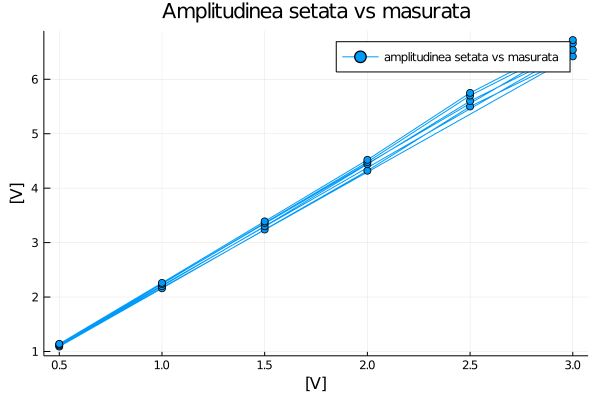

In [8]:
# amplitudinea
h2=plot(in_amplit, meas_amplit; markershape=:circle, label="amplitudinea setata vs masurata"); # ,ylims=(0, 6)
title!("Amplitudinea setata vs masurata");
xlabel!("[V]");
ylabel!("[V]");
display(h2)

1.3.7 Salvarea datelor in fisierul .csv

In [9]:
df = DataFrame(
    "Frecventa [Hz]" => in_freq,
    "Frecventa masurata [Hz]" => meas_freq,
    "Amplitudinea [V]" => in_amplit,
    "Amplitudinea masurata [V]" => meas_amplit,
    )
CSV.write("02_caract_semnale.csv", df)

"02_caract_semnale.csv"

1.3.8 Deconectarea instrumentelor

In [10]:
disconnect!(fgen_handle)
disconnect!(scope_handle)

0

#### 1.4 Desfasurarea lucrarii:

1. Adăugați în interiorul buclei for o funcție care ajustează offset-ul generatorului de semnal.
2. Adăugați o măsurătoare în cadrul osciloscopului pentru offset-ul semnalului.
3. Adăugați în fișier două coloane: offset-ul reglat și cel măsurat.